In [18]:
import pandas as pd
import numpy as np

In [19]:
with open("train/train.csv", 'r') as file:
    df = pd.read_csv(file)

In [20]:
print(df.columns)
df.head()

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [21]:
df.shape

(14993, 24)

In [22]:
df = df[df["Quantity"] == 1]
df.drop(["RescuerID", "State", "VideoAmt", "Description", "Name", "PetID", "Quantity", "PhotoAmt"], axis = 1, inplace = True)
print(df.columns)

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Fee', 'AdoptionSpeed'],
      dtype='object')


In [29]:
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,100,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,150,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,0,2


In [30]:
df.shape

(11565, 16)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("AdoptionSpeed", axis = 1), df["AdoptionSpeed"], test_size=0.3, random_state=1)

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=12,random_state=1)
clf_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [33]:
print("Train = " , clf_rf.score(X_train, y_train))
print("Test = ", clf_rf.score(X_test, y_test))

Train =  0.9041383570105003
Test =  0.35763688760806917


Text(0.5, 0, 'Number of Trees')

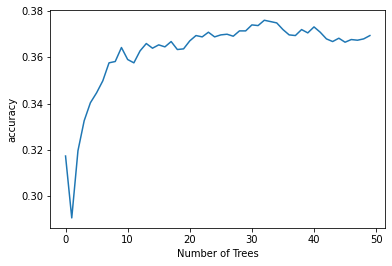

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

trees=range(50)
accuracy=np.zeros(50)
for idx in range(len(trees)):
    clf_rf=RandomForestClassifier(random_state=1, n_estimators=idx + 1)
    clf_rf.fit(X_train,y_train)
    accuracy[idx]=clf_rf.score(X_test, y_test)  

plt.plot(trees, accuracy)
plt.ylabel('accuracy')
plt.xlabel('Number of Trees')

In [35]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':list(range(3,6)),'min_samples_split':list(range(2,100,1)),
          'n_estimators':list(range(45,95,5))}
clf_rf=RandomForestClassifier(random_state=1, n_estimators=idx + 1)
clf_gs=GridSearchCV(clf_rf, params, scoring = 'accuracy', cv=5, n_jobs=4, verbose=2)
clf_gs.fit(df.drop("AdoptionSpeed", axis = 1), df["AdoptionSpeed"])

Fitting 5 folds for each of 2940 candidates, totalling 14700 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   22.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   49.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 10.0min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed: 11.9min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 13.8min
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 15.8min
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 17.9min

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              o...dom_state=1,
                                              verbos

In [36]:
clf_gs.best_score_# your code here

0.3974924340683096

In [37]:
clf_gs.best_params_# your code here

{'min_samples_leaf': 5, 'min_samples_split': 37, 'n_estimators': 55}

In [9]:
from sklearn.svm import SVC

clf_SVC = SVC(random_state=1, kernel="rbf")
clf_SVC.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
print("Train = " , clf_SVC.score(X_train, y_train))
print("Test = ", clf_SVC.score(X_test, y_test))

Train =  0.3468807906114886
Test =  0.34178674351585014


In [98]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
params = {'kernel': ['rbf'], 'C': [1.0]}
clf_SVC = SVC(random_state=1)
clf_gs=GridSearchCV(clf_SVC, params, scoring = 'accuracy', cv=5, n_jobs=4, verbose=2)
clf_gs.fit(df.drop("AdoptionSpeed", axis = 1), df["AdoptionSpeed"])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   14.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [1.0], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [99]:
clf_gs.best_score_# your code here

0.33523562472978813

In [100]:
clf_gs.best_params_# your code here

{'C': 1.0, 'kernel': 'rbf'}

In [25]:
import matplotlib.pyplot as plt
X = df.drop("AdoptionSpeed", axis = 1)
y = df['AdoptionSpeed']
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

In [12]:
from sklearn.preprocessing import StandardScaler
features = df.drop('AdoptionSpeed', axis=1).columns# Separating out the features
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['AdoptionSpeed']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [14]:
finalDf = pd.concat([principalDf, df[['AdoptionSpeed']]], axis = 1)

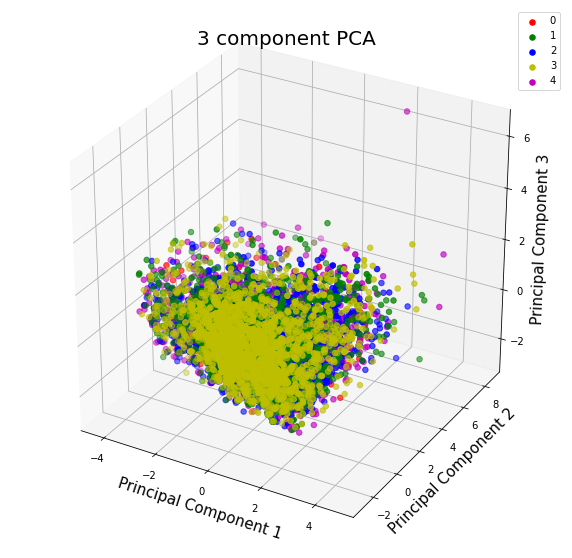

<Figure size 576x288 with 0 Axes>

In [15]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize = (10,10))
plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['AdoptionSpeed'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()

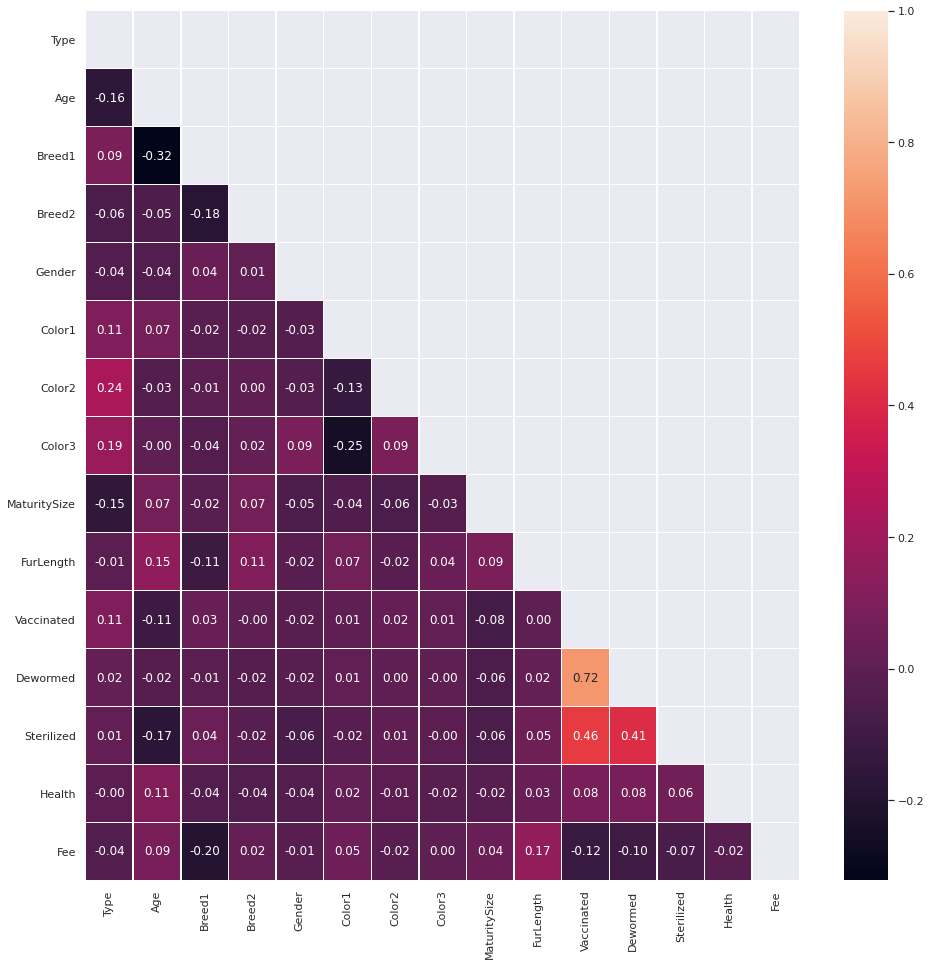

In [64]:
import seaborn as sns
f,ax = plt.subplots(figsize=(16, 16))
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool))
sns.heatmap(X.corr(), mask=mask, annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.savefig("heatmap.png")
plt.show()


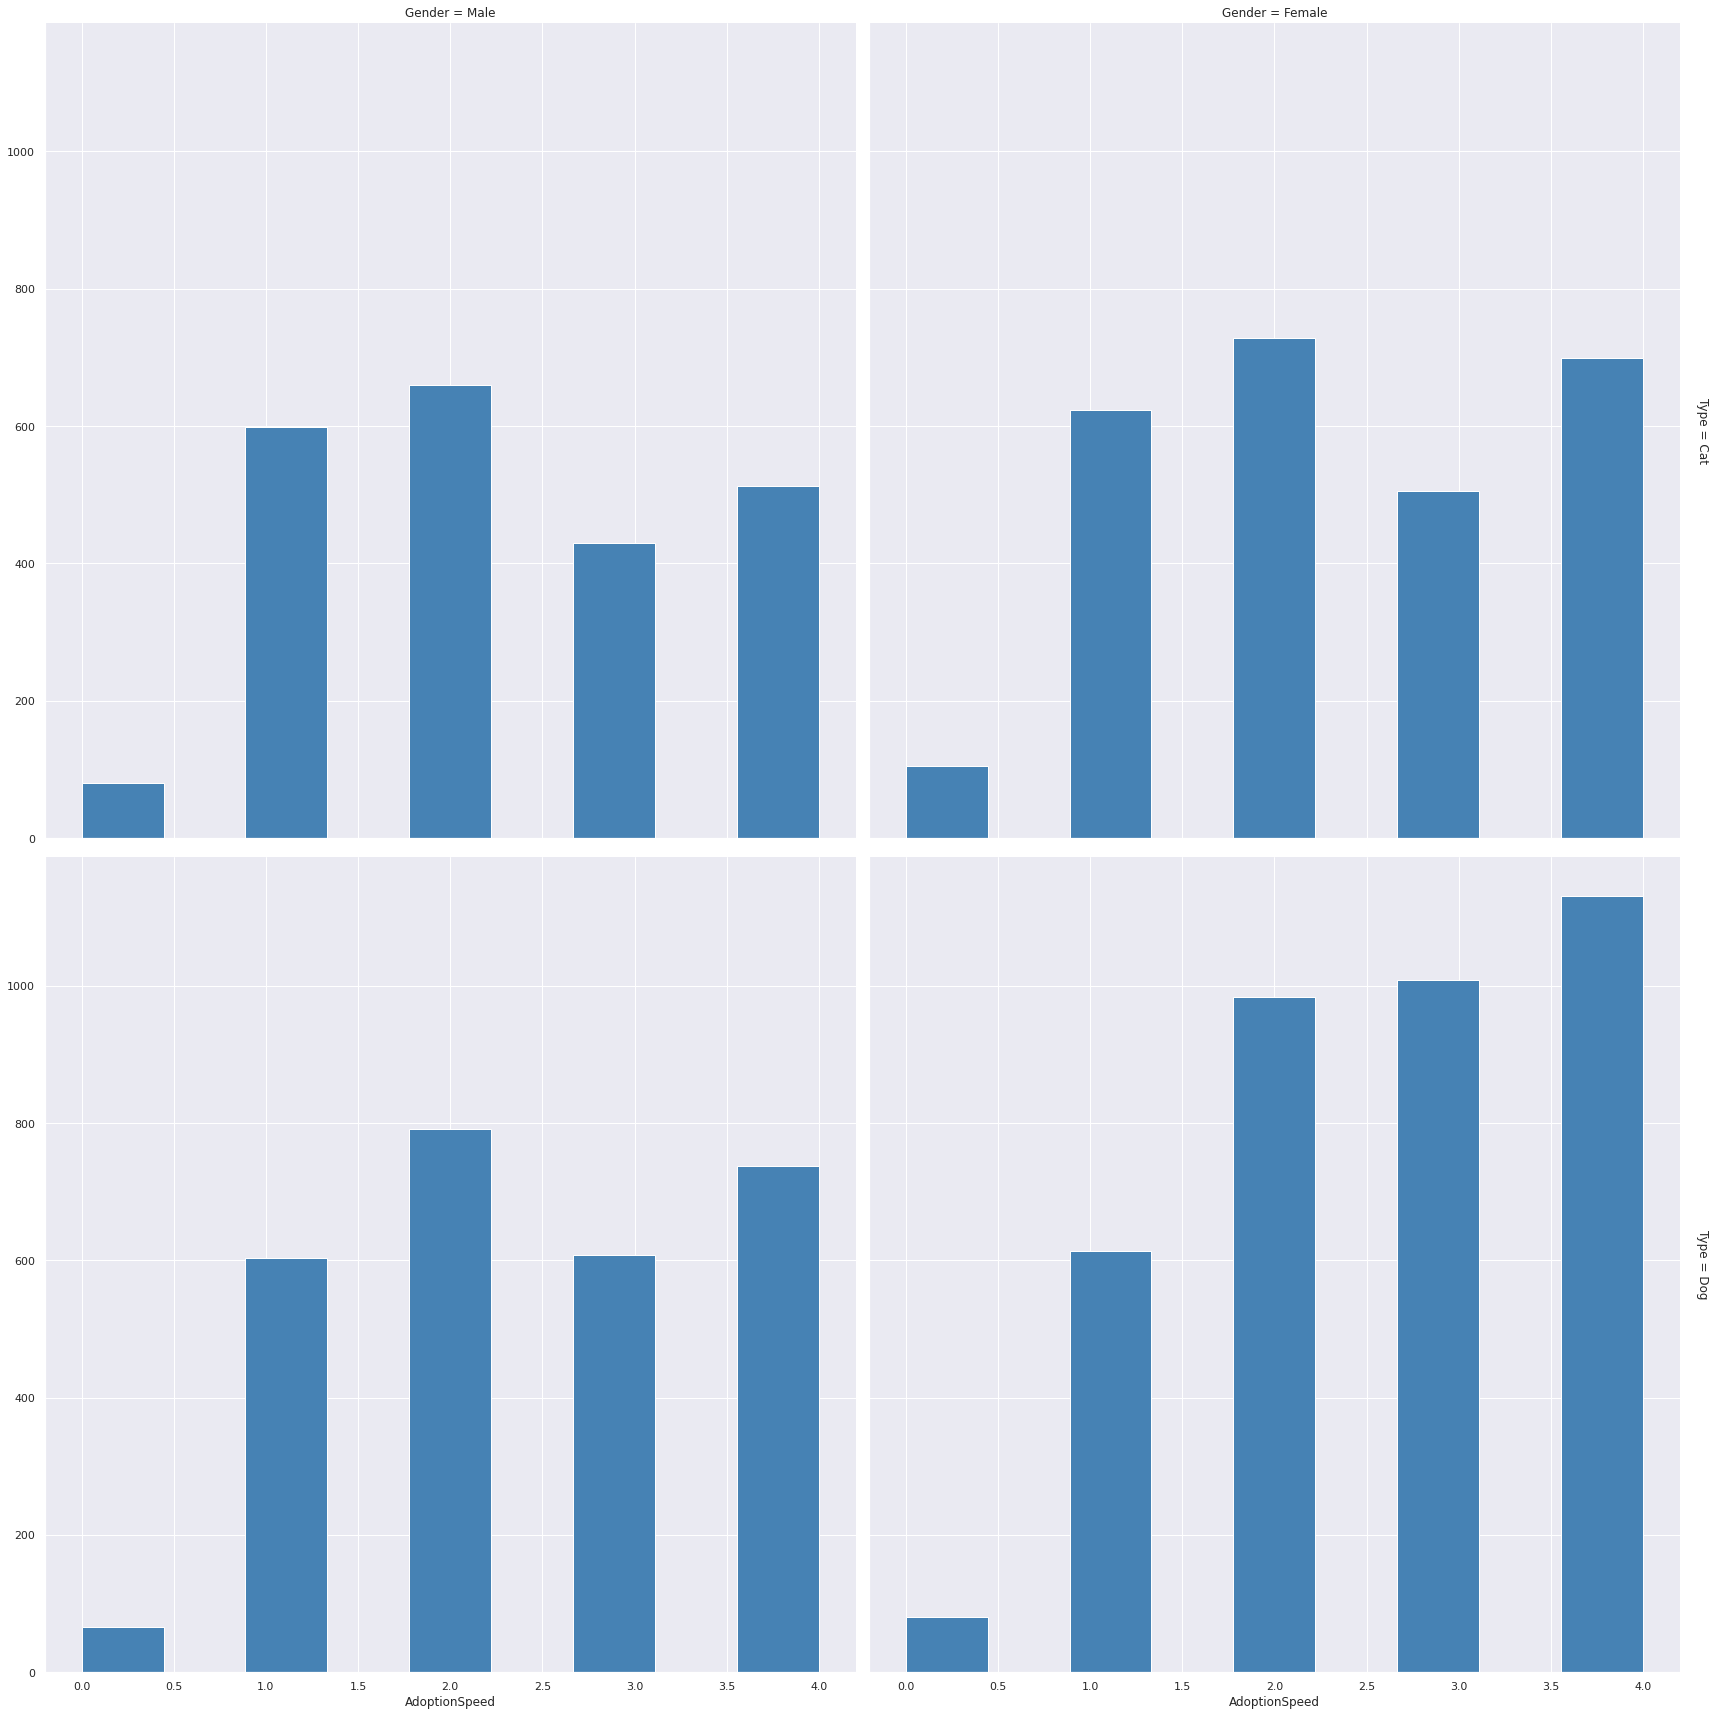

In [63]:
import seaborn as sns

sns.set(style="darkgrid")
df_c = df.copy()
df_c.replace({'Gender': {1: 'Male', 2: 'Female'}, 'Type': {1: 'Dog', 2: 'Cat'}}, inplace = True)


g = sns.FacetGrid(df_c, row="Type", col="Gender", margin_titles=True, height = 12)
bins = np.linspace(0, 4, 10)
g.map(plt.hist, "AdoptionSpeed", color="steelblue", bins=bins)
plt.savefig("gridfacet.png")

del df_c

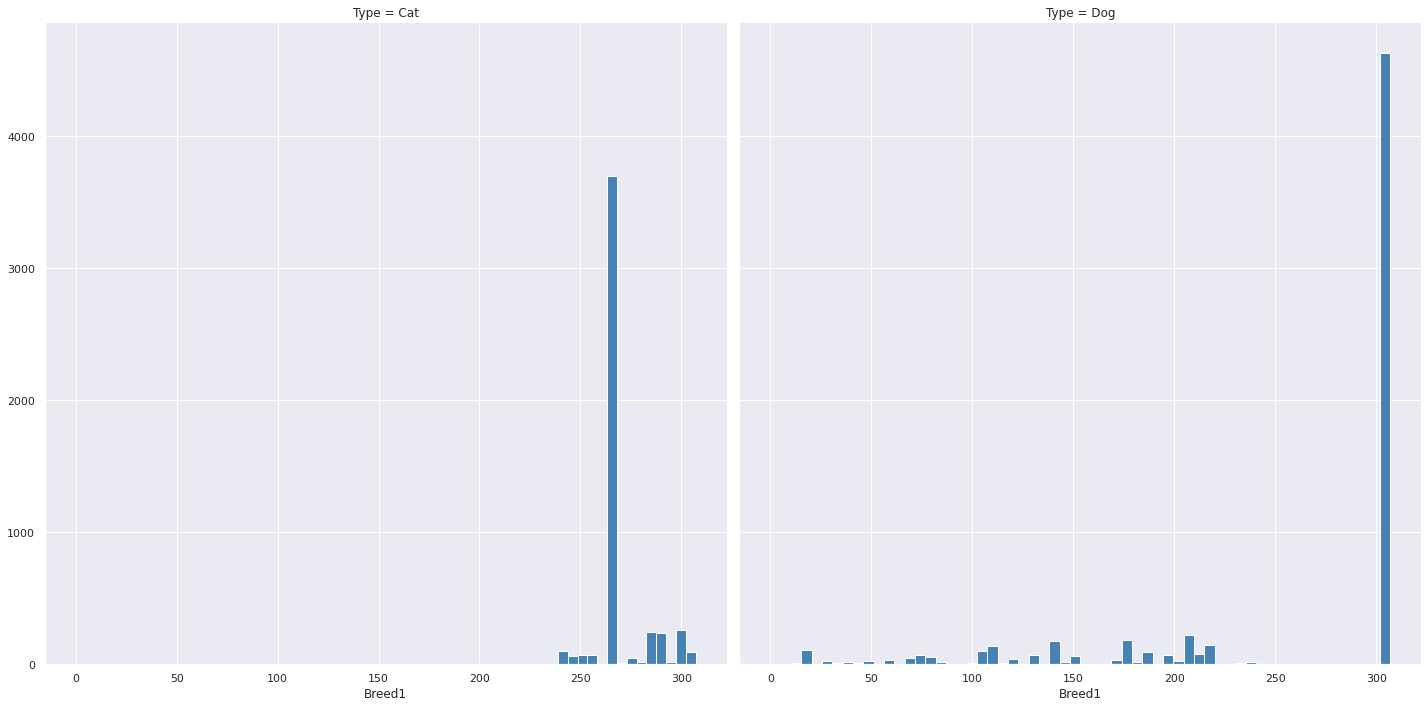

In [66]:
import seaborn as sns

sns.set(style="darkgrid")
df_c = df.copy()
df_c.replace({'Type': {1: 'Dog', 2: 'Cat'}}, inplace = True)
g = sns.FacetGrid(df_c, col="Type", margin_titles=True, height= 10)
g.map(plt.hist, "Breed1", color="steelblue", bins=60)
plt.savefig('breed_cat_dog.png')
del df_c


In [18]:
most_frequents = df['Breed1'].value_counts()[:10].index.tolist()# 307 are mixed breeds
print(most_frequents)

breeds = pd.read_csv('breed_labels.csv')
breeds.loc[breeds['BreedID'].isin(most_frequents)]
for i in most_frequents:
    breed = breeds.loc[breeds['BreedID'] == i]
    type = 'Dog' if breed['Type'].item() == 1 else 'Cat'
    print(type, breed['BreedName'].item())

[307, 266, 265, 299, 264, 292, 285, 205, 141, 179]
Dog Mixed Breed
Cat Domestic Short Hair
Cat Domestic Medium Hair
Cat Tabby
Cat Domestic Long Hair
Cat Siamese
Cat Persian
Dog Shih Tzu
Dog Labrador Retriever
Dog Poodle


In [9]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

/home/guillaume/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/guillaume/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/guillaume/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/guillaume/.local/lib/python3.7/site-packages/tensorboar

In [10]:
X = np.array(df.drop('AdoptionSpeed', axis = 1))
Y = df['AdoptionSpeed']
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = to_categorical(Y)
X = tf.keras.utils.normalize(
    X, axis=-1, order=1
)

print(X)

[[0.00473934 0.007109   0.70853081 ... 0.00473934 0.00236967 0.23696682]
 [0.00699301 0.0034965  0.92657343 ... 0.01048951 0.0034965  0.        ]
 [0.00304878 0.00304878 0.93597561 ... 0.00609756 0.00304878 0.        ]
 ...
 [0.00452489 0.02714932 0.88235294 ... 0.00904977 0.00452489 0.        ]
 [0.00675676 0.03040541 0.89864865 ... 0.00337838 0.00337838 0.        ]
 [0.00158983 0.00158983 0.48807631 ... 0.00317965 0.00158983 0.        ]]


In [11]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size = 0.2, random_state = 1)

In [100]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=1)
train, val = train_test_split(train, test_size=0.3, random_state=1)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


5666 train examples
2429 validation examples
3470 test examples


In [101]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('AdoptionSpeed')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [18]:
input_dim = len(df.columns) - 1

def get_compiled_model():
    model = tf.keras.Sequential([
        layers.Dense(128, input_dim = input_dim , activation = 'selu'),
        layers.Dense(32, activation = 'selu'),
        layers.Dense(128, activation = 'selu'),
        layers.Dense(32, activation = 'selu'),
        layers.Dense(5, activation = 'selu'),
        layers.Activation('softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model




In [19]:
model = get_compiled_model()
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 165       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 14,693
Trainable params: 14,693
Non-trainable params: 0
__________________________________________________

In [20]:
history = model.fit(train_x, train_y, validation_data = (test_x, test_y), epochs = 50, batch_size = 10)
history.history

Epoch 1/50
926/926 [==============================] - 2s 3ms/step - loss: 1.5697 - accuracy: 0.2748 - val_loss: 1.5628 - val_accuracy: 0.2836
Epoch 2/50
926/926 [==============================] - 2s 2ms/step - loss: 1.5596 - accuracy: 0.2996 - val_loss: 1.5564 - val_accuracy: 0.3143
Epoch 3/50
926/926 [==============================] - 2s 2ms/step - loss: 1.5470 - accuracy: 0.3176 - val_loss: 1.5353 - val_accuracy: 0.3394
Epoch 4/50
926/926 [==============================] - 2s 2ms/step - loss: 1.5353 - accuracy: 0.3361 - val_loss: 1.5442 - val_accuracy: 0.3377
Epoch 5/50
926/926 [==============================] - 2s 2ms/step - loss: 1.5322 - accuracy: 0.3388 - val_loss: 1.5268 - val_accuracy: 0.3428
Epoch 6/50
926/926 [==============================] - 2s 3ms/step - loss: 1.5262 - accuracy: 0.3455 - val_loss: 1.5230 - val_accuracy: 0.3398
Epoch 7/50
926/926 [==============================] - 2s 3ms/step - loss: 1.5291 - accuracy: 0.3413 - val_loss: 1.5190 - val_accuracy: 0.3619
Epoch 

{'loss': [1.569697380065918,
  1.5595617294311523,
  1.5470454692840576,
  1.5353267192840576,
  1.5322299003601074,
  1.5261789560317993,
  1.5291138887405396,
  1.5211297273635864,
  1.520900011062622,
  1.5216559171676636,
  1.5206512212753296,
  1.5190926790237427,
  1.5199370384216309,
  1.5142253637313843,
  1.5170613527297974,
  1.5129542350769043,
  1.5170270204544067,
  1.513311505317688,
  1.5129544734954834,
  1.5125553607940674,
  1.5162655115127563,
  1.5127252340316772,
  1.5115667581558228,
  1.509597659111023,
  1.5101096630096436,
  1.5087922811508179,
  1.5104327201843262,
  1.5111793279647827,
  1.5094915628433228,
  1.5074446201324463,
  1.5097410678863525,
  1.5089818239212036,
  1.5073285102844238,
  1.508147954940796,
  1.5082166194915771,
  1.5090434551239014,
  1.5055168867111206,
  1.5069795846939087,
  1.5056383609771729,
  1.5082287788391113,
  1.5083032846450806,
  1.5077803134918213,
  1.5060346126556396,
  1.5055056810379028,
  1.5061769485473633,
  1.506

In [21]:
loss, accuracy = model.evaluate(test_x, test_y)
print("Accuracy", accuracy)
model.save('successful_crane.h5')


73/73 [==============================] - 0s 2ms/step - loss: 1.5145 - accuracy: 0.3545
Accuracy 0.35451793670654297


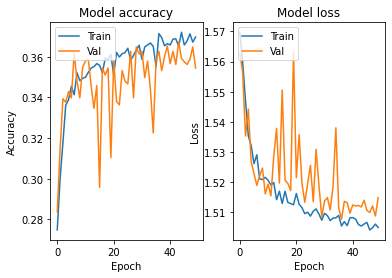

In [22]:
ax = plt.subplot()

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.savefig("tel.png")
plt.show()


In [61]:
!pip install coolname
from coolname import generate_slug
import os
import itertools
path = "models/"

Defaulting to user installation because normal site-packages is not writeable


In [69]:
input_dim = len(df.columns) - 1


def layer1(x, activation = 'selu'):
    return layers.Dense(x, input_dim = input_dim , activation = activation)

def layer2(x, activation = 'selu'):
    return layers.Dense(x, activation = activation)



In [103]:

def compile_model(model):
    
    model.compile(optimizer='Nadam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

    
def run_model(entry_size, activation, given_size):
    model = tf.keras.Sequential([
        layer1(entry_size, activation),
        layer2(given_size, activation),
        layer2(entry_size, activation),
        layers.Dense(5, activation = 'softmax')
    ])
    # On compile le model
    model = compile_model(model)
    # On cree l'endroit ou il sera stocke
    name = generate_slug(2)
    model_path = os.path.join(path, name)
    os.mkdir(model_path)
    # On dump les params
    with open(os.path.join(model_path, 'params.txt'), 'w') as fh:
        fh.write("EntrySize={}\nActivation={}\nGivenSize={}".format(entry_size, activation, given_size))
    # On ecrit le summary
    report_path = os.path.join(model_path, 'summary.txt')
    with open(report_path, 'w') as fh:
        model.summary(print_fn=lambda x: fh.write(x + '\n'))
    # On fit le model
    history = model.fit(train_x, train_y, validation_data = (test_x, test_y), epochs = 50, batch_size = 10)
    
    # Calcul de son accuracy
    loss, accuracy = model.evaluate(test_x, test_y)
    accuracy_report = os.path.join(model_path, 'accuracy.txt')
    with open(accuracy_report, 'w') as fh:
        fh.write('Accuracy={}\nLoss={}'.format(accuracy, loss))
    print("Accuracy", accuracy)
    # save model
    model.save(os.path.join(model_path, 'model.h5'))
    
    ax = plt.subplot()
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig(os.path.join(model_path, 'graph.png'))

def run_models():
    
    activs=['selu','sigmoid','relu']
    size=[32, 64, 128]
        
    product = list(itertools.product(activs, size))
    print("%d combinations to test !" % (len(size) * len(product)))
    for entry_size in size:
        for activation, given_size in product:
            run_model(entry_size, activation, given_size)
    
    


27 combinations to test !
Train on 9252 samples, validate on 2313 samples
Epoch 1/50
9252/9252 [==============================] - 4s 438us/sample - loss: 1.5665 - accuracy: 0.2705 - val_loss: 1.5653 - val_accuracy: 0.2719
Epoch 2/50
9252/9252 [==============================] - 4s 401us/sample - loss: 1.5607 - accuracy: 0.2882 - val_loss: 1.5586 - val_accuracy: 0.3074
Epoch 3/50
9252/9252 [==============================] - 4s 401us/sample - loss: 1.5531 - accuracy: 0.3132 - val_loss: 1.5481 - val_accuracy: 0.3316
Epoch 4/50
9252/9252 [==============================] - 3s 358us/sample - loss: 1.5425 - accuracy: 0.3325 - val_loss: 1.5386 - val_accuracy: 0.3420
Epoch 5/50
9252/9252 [==============================] - 3s 375us/sample - loss: 1.5347 - accuracy: 0.3470 - val_loss: 1.5419 - val_accuracy: 0.3325
Epoch 6/50
9252/9252 [==============================] - 3s 360us/sample - loss: 1.5300 - accuracy: 0.3498 - val_loss: 1.5328 - val_accuracy: 0.3459
Epoch 7/50
9252/9252 [================

9252/9252 [==============================] - 3s 360us/sample - loss: 1.5229 - accuracy: 0.3517 - val_loss: 1.5266 - val_accuracy: 0.3407
Epoch 9/50
9252/9252 [==============================] - 5s 497us/sample - loss: 1.5207 - accuracy: 0.3522 - val_loss: 1.5204 - val_accuracy: 0.3433
Epoch 10/50
9252/9252 [==============================] - 4s 412us/sample - loss: 1.5177 - accuracy: 0.3566 - val_loss: 1.5167 - val_accuracy: 0.3502
Epoch 11/50
9252/9252 [==============================] - 4s 380us/sample - loss: 1.5155 - accuracy: 0.3624 - val_loss: 1.5266 - val_accuracy: 0.3437
Epoch 12/50
9252/9252 [==============================] - 3s 371us/sample - loss: 1.5163 - accuracy: 0.3555 - val_loss: 1.5172 - val_accuracy: 0.3532
Epoch 13/50
9252/9252 [==============================] - 3s 344us/sample - loss: 1.5137 - accuracy: 0.3605 - val_loss: 1.5148 - val_accuracy: 0.3519
Epoch 14/50
9252/9252 [==============================] - 4s 397us/sample - loss: 1.5126 - accuracy: 0.3595 - val_loss: 

9252/9252 [==============================] - 4s 383us/sample - loss: 1.5615 - accuracy: 0.2797 - val_loss: 1.5623 - val_accuracy: 0.3130
Epoch 13/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5614 - accuracy: 0.2855 - val_loss: 1.5618 - val_accuracy: 0.3104
Epoch 14/50
9252/9252 [==============================] - 3s 373us/sample - loss: 1.5610 - accuracy: 0.2872 - val_loss: 1.5615 - val_accuracy: 0.2849
Epoch 15/50
9252/9252 [==============================] - 3s 365us/sample - loss: 1.5611 - accuracy: 0.2839 - val_loss: 1.5620 - val_accuracy: 0.2836
Epoch 16/50
9252/9252 [==============================] - 4s 413us/sample - loss: 1.5606 - accuracy: 0.2871 - val_loss: 1.5601 - val_accuracy: 0.2806
Epoch 17/50
9252/9252 [==============================] - 4s 382us/sample - loss: 1.5605 - accuracy: 0.2928 - val_loss: 1.5605 - val_accuracy: 0.2918
Epoch 18/50
9252/9252 [==============================] - 3s 359us/sample - loss: 1.5601 - accuracy: 0.2923 - val_loss:

9252/9252 [==============================] - 3s 348us/sample - loss: 1.5610 - accuracy: 0.2846 - val_loss: 1.5618 - val_accuracy: 0.2949
Epoch 17/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5607 - accuracy: 0.2912 - val_loss: 1.5606 - val_accuracy: 0.3096
Epoch 18/50
9252/9252 [==============================] - 3s 345us/sample - loss: 1.5601 - accuracy: 0.2933 - val_loss: 1.5655 - val_accuracy: 0.2815
Epoch 19/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5601 - accuracy: 0.2937 - val_loss: 1.5593 - val_accuracy: 0.2853
Epoch 20/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5593 - accuracy: 0.3000 - val_loss: 1.5597 - val_accuracy: 0.2815
Epoch 21/50
9252/9252 [==============================] - 3s 343us/sample - loss: 1.5586 - accuracy: 0.2965 - val_loss: 1.5585 - val_accuracy: 0.2914
Epoch 22/50
9252/9252 [==============================] - 3s 344us/sample - loss: 1.5578 - accuracy: 0.3004 - val_loss:

9252/9252 [==============================] - 3s 348us/sample - loss: 1.5612 - accuracy: 0.2791 - val_loss: 1.5623 - val_accuracy: 0.2728
Epoch 21/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5608 - accuracy: 0.2805 - val_loss: 1.5619 - val_accuracy: 0.2858
Epoch 22/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5610 - accuracy: 0.2811 - val_loss: 1.5632 - val_accuracy: 0.2832
Epoch 23/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5609 - accuracy: 0.2821 - val_loss: 1.5624 - val_accuracy: 0.2702
Epoch 24/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5610 - accuracy: 0.2742 - val_loss: 1.5613 - val_accuracy: 0.2910
Epoch 25/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5607 - accuracy: 0.2789 - val_loss: 1.5620 - val_accuracy: 0.2711
Epoch 26/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5606 - accuracy: 0.2778 - val_loss:

9252/9252 [==============================] - 3s 353us/sample - loss: 1.5046 - accuracy: 0.3726 - val_loss: 1.5125 - val_accuracy: 0.3645
Epoch 25/50
9252/9252 [==============================] - 3s 352us/sample - loss: 1.5048 - accuracy: 0.3700 - val_loss: 1.5128 - val_accuracy: 0.3584
Epoch 26/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5034 - accuracy: 0.3735 - val_loss: 1.5164 - val_accuracy: 0.3485
Epoch 27/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5036 - accuracy: 0.3704 - val_loss: 1.5132 - val_accuracy: 0.3584
Epoch 28/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5041 - accuracy: 0.3734 - val_loss: 1.5196 - val_accuracy: 0.3537
Epoch 29/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5043 - accuracy: 0.3717 - val_loss: 1.5314 - val_accuracy: 0.3303
Epoch 30/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5026 - accuracy: 0.3720 - val_loss:

9252/9252 [==============================] - 3s 348us/sample - loss: 1.5032 - accuracy: 0.3751 - val_loss: 1.5119 - val_accuracy: 0.3623
Epoch 29/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5028 - accuracy: 0.3764 - val_loss: 1.5075 - val_accuracy: 0.3632
Epoch 30/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5027 - accuracy: 0.3715 - val_loss: 1.5118 - val_accuracy: 0.3649
Epoch 31/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5030 - accuracy: 0.3736 - val_loss: 1.5127 - val_accuracy: 0.3666
Epoch 32/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5035 - accuracy: 0.3707 - val_loss: 1.5122 - val_accuracy: 0.3610
Epoch 33/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5027 - accuracy: 0.3738 - val_loss: 1.5087 - val_accuracy: 0.3653
Epoch 34/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5020 - accuracy: 0.3754 - val_loss:

9252/9252 [==============================] - 3s 349us/sample - loss: 1.5021 - accuracy: 0.3773 - val_loss: 1.5073 - val_accuracy: 0.3653
Epoch 33/50
9252/9252 [==============================] - 3s 352us/sample - loss: 1.5016 - accuracy: 0.3769 - val_loss: 1.5076 - val_accuracy: 0.3623
Epoch 34/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5015 - accuracy: 0.3727 - val_loss: 1.5124 - val_accuracy: 0.3480
Epoch 35/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5016 - accuracy: 0.3732 - val_loss: 1.5106 - val_accuracy: 0.3658
Epoch 36/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5024 - accuracy: 0.3716 - val_loss: 1.5127 - val_accuracy: 0.3554
Epoch 37/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5018 - accuracy: 0.3765 - val_loss: 1.5126 - val_accuracy: 0.3614
Epoch 38/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5000 - accuracy: 0.3722 - val_loss:

9252/9252 [==============================] - 3s 347us/sample - loss: 1.5219 - accuracy: 0.3552 - val_loss: 1.5184 - val_accuracy: 0.3550
Epoch 37/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5223 - accuracy: 0.3524 - val_loss: 1.5182 - val_accuracy: 0.3558
Epoch 38/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5219 - accuracy: 0.3550 - val_loss: 1.5207 - val_accuracy: 0.3485
Epoch 39/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5218 - accuracy: 0.3567 - val_loss: 1.5187 - val_accuracy: 0.3610
Epoch 40/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5212 - accuracy: 0.3569 - val_loss: 1.5243 - val_accuracy: 0.3450
Epoch 41/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5197 - accuracy: 0.3547 - val_loss: 1.5171 - val_accuracy: 0.3623
Epoch 42/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5211 - accuracy: 0.3555 - val_loss:

9252/9252 [==============================] - 3s 351us/sample - loss: 1.5192 - accuracy: 0.3570 - val_loss: 1.5212 - val_accuracy: 0.3588
Epoch 41/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5160 - accuracy: 0.3600 - val_loss: 1.5194 - val_accuracy: 0.3575
Epoch 42/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5114 - accuracy: 0.3623 - val_loss: 1.5221 - val_accuracy: 0.3506
Epoch 43/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5113 - accuracy: 0.3634 - val_loss: 1.5085 - val_accuracy: 0.3627
Epoch 44/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5100 - accuracy: 0.3642 - val_loss: 1.5104 - val_accuracy: 0.3688
Epoch 45/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5083 - accuracy: 0.3628 - val_loss: 1.5090 - val_accuracy: 0.3692
Epoch 46/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5071 - accuracy: 0.3627 - val_loss:

9252/9252 [==============================] - 3s 344us/sample - loss: 1.5043 - accuracy: 0.3689 - val_loss: 1.5137 - val_accuracy: 0.3545
Epoch 45/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5060 - accuracy: 0.3680 - val_loss: 1.5150 - val_accuracy: 0.3610
Epoch 46/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5043 - accuracy: 0.3726 - val_loss: 1.5072 - val_accuracy: 0.3658
Epoch 47/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5051 - accuracy: 0.3674 - val_loss: 1.5150 - val_accuracy: 0.3614
Epoch 48/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5059 - accuracy: 0.3678 - val_loss: 1.5089 - val_accuracy: 0.3757
Epoch 49/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5032 - accuracy: 0.3659 - val_loss: 1.5190 - val_accuracy: 0.3489
Epoch 50/50
2313/2313 [==============================] - 0s 45us/sample - loss: 1.5139 - accuracy: 0.3593
Accuracy 0.3

9252/9252 [==============================] - 3s 341us/sample - loss: 1.5275 - accuracy: 0.3515 - val_loss: 1.5256 - val_accuracy: 0.3545
Epoch 49/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5285 - accuracy: 0.3520 - val_loss: 1.5259 - val_accuracy: 0.3545
Epoch 50/50
2313/2313 [==============================] - 0s 48us/sample - loss: 1.5301 - accuracy: 0.3407
Accuracy 0.3406831
Train on 9252 samples, validate on 2313 samples
Epoch 1/50
9252/9252 [==============================] - 4s 415us/sample - loss: 1.5678 - accuracy: 0.2641 - val_loss: 1.5663 - val_accuracy: 0.2672
Epoch 2/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5651 - accuracy: 0.2737 - val_loss: 1.5671 - val_accuracy: 0.2685
Epoch 3/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5652 - accuracy: 0.2741 - val_loss: 1.5658 - val_accuracy: 0.2685
Epoch 4/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5655 - accuracy

9252/9252 [==============================] - 4s 412us/sample - loss: 1.5672 - accuracy: 0.2767 - val_loss: 1.5662 - val_accuracy: 0.2685
Epoch 2/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5656 - accuracy: 0.2755 - val_loss: 1.5696 - val_accuracy: 0.2672
Epoch 3/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5656 - accuracy: 0.2690 - val_loss: 1.5651 - val_accuracy: 0.2806
Epoch 4/50
9252/9252 [==============================] - 3s 352us/sample - loss: 1.5653 - accuracy: 0.2701 - val_loss: 1.5666 - val_accuracy: 0.2685
Epoch 5/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5649 - accuracy: 0.2745 - val_loss: 1.5656 - val_accuracy: 0.2685
Epoch 6/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5641 - accuracy: 0.2770 - val_loss: 1.5649 - val_accuracy: 0.2750
Epoch 7/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5639 - accuracy: 0.2785 - val_loss: 1.567

9252/9252 [==============================] - 3s 349us/sample - loss: 1.5263 - accuracy: 0.3485 - val_loss: 1.5239 - val_accuracy: 0.3437
Epoch 6/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5210 - accuracy: 0.3556 - val_loss: 1.5182 - val_accuracy: 0.3506
Epoch 7/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5185 - accuracy: 0.3518 - val_loss: 1.5151 - val_accuracy: 0.3541
Epoch 8/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5161 - accuracy: 0.3598 - val_loss: 1.5188 - val_accuracy: 0.3454
Epoch 9/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5138 - accuracy: 0.3613 - val_loss: 1.5113 - val_accuracy: 0.3679
Epoch 10/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5118 - accuracy: 0.3637 - val_loss: 1.5210 - val_accuracy: 0.3567
Epoch 11/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5119 - accuracy: 0.3661 - val_loss: 1.5

9252/9252 [==============================] - 3s 348us/sample - loss: 1.5124 - accuracy: 0.3647 - val_loss: 1.5225 - val_accuracy: 0.3476
Epoch 10/50
9252/9252 [==============================] - 3s 345us/sample - loss: 1.5135 - accuracy: 0.3589 - val_loss: 1.5129 - val_accuracy: 0.3709
Epoch 11/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5115 - accuracy: 0.3598 - val_loss: 1.5144 - val_accuracy: 0.3550
Epoch 12/50
9252/9252 [==============================] - 3s 344us/sample - loss: 1.5097 - accuracy: 0.3644 - val_loss: 1.5130 - val_accuracy: 0.3584
Epoch 13/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5108 - accuracy: 0.3639 - val_loss: 1.5115 - val_accuracy: 0.3554
Epoch 14/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5075 - accuracy: 0.3662 - val_loss: 1.5187 - val_accuracy: 0.3463
Epoch 15/50
9252/9252 [==============================] - 3s 345us/sample - loss: 1.5084 - accuracy: 0.3658 - val_loss:

9252/9252 [==============================] - 3s 349us/sample - loss: 1.5090 - accuracy: 0.3646 - val_loss: 1.5107 - val_accuracy: 0.3619
Epoch 14/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5094 - accuracy: 0.3633 - val_loss: 1.5118 - val_accuracy: 0.3623
Epoch 15/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5076 - accuracy: 0.3675 - val_loss: 1.5123 - val_accuracy: 0.3593
Epoch 16/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5075 - accuracy: 0.3684 - val_loss: 1.5107 - val_accuracy: 0.3562
Epoch 17/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5067 - accuracy: 0.3679 - val_loss: 1.5127 - val_accuracy: 0.3597
Epoch 18/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5062 - accuracy: 0.3674 - val_loss: 1.5115 - val_accuracy: 0.3709
Epoch 19/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5063 - accuracy: 0.3688 - val_loss:

9252/9252 [==============================] - 3s 351us/sample - loss: 1.5253 - accuracy: 0.3492 - val_loss: 1.5224 - val_accuracy: 0.3528
Epoch 18/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5257 - accuracy: 0.3504 - val_loss: 1.5257 - val_accuracy: 0.3459
Epoch 19/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5258 - accuracy: 0.3482 - val_loss: 1.5255 - val_accuracy: 0.3480
Epoch 20/50
9252/9252 [==============================] - 3s 352us/sample - loss: 1.5249 - accuracy: 0.3511 - val_loss: 1.5239 - val_accuracy: 0.3524
Epoch 21/50
9252/9252 [==============================] - 3s 345us/sample - loss: 1.5239 - accuracy: 0.3529 - val_loss: 1.5345 - val_accuracy: 0.3372
Epoch 22/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5245 - accuracy: 0.3550 - val_loss: 1.5446 - val_accuracy: 0.3294
Epoch 23/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5246 - accuracy: 0.3501 - val_loss:

9252/9252 [==============================] - 3s 345us/sample - loss: 1.5254 - accuracy: 0.3557 - val_loss: 1.5291 - val_accuracy: 0.3433
Epoch 22/50
9252/9252 [==============================] - 3s 343us/sample - loss: 1.5249 - accuracy: 0.3521 - val_loss: 1.5227 - val_accuracy: 0.3528
Epoch 23/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5255 - accuracy: 0.3486 - val_loss: 1.5229 - val_accuracy: 0.3498
Epoch 24/50
9252/9252 [==============================] - 3s 344us/sample - loss: 1.5258 - accuracy: 0.3512 - val_loss: 1.5217 - val_accuracy: 0.3567
Epoch 25/50
9252/9252 [==============================] - 3s 342us/sample - loss: 1.5259 - accuracy: 0.3504 - val_loss: 1.5235 - val_accuracy: 0.3485
Epoch 26/50
9252/9252 [==============================] - 3s 345us/sample - loss: 1.5245 - accuracy: 0.3481 - val_loss: 1.5245 - val_accuracy: 0.3489
Epoch 27/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5249 - accuracy: 0.3480 - val_loss:

9252/9252 [==============================] - 3s 348us/sample - loss: 1.5258 - accuracy: 0.3506 - val_loss: 1.5220 - val_accuracy: 0.3502
Epoch 26/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5229 - accuracy: 0.3542 - val_loss: 1.5251 - val_accuracy: 0.3472
Epoch 27/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5235 - accuracy: 0.3514 - val_loss: 1.5485 - val_accuracy: 0.2996
Epoch 28/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5249 - accuracy: 0.3494 - val_loss: 1.5215 - val_accuracy: 0.3528
Epoch 29/50
9252/9252 [==============================] - 3s 352us/sample - loss: 1.5230 - accuracy: 0.3564 - val_loss: 1.5275 - val_accuracy: 0.3467
Epoch 30/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5223 - accuracy: 0.3526 - val_loss: 1.5266 - val_accuracy: 0.3437
Epoch 31/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5150 - accuracy: 0.3623 - val_loss:

9252/9252 [==============================] - 3s 348us/sample - loss: 1.5288 - accuracy: 0.3444 - val_loss: 1.5239 - val_accuracy: 0.3407
Epoch 30/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5272 - accuracy: 0.3474 - val_loss: 1.5313 - val_accuracy: 0.3368
Epoch 31/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5266 - accuracy: 0.3487 - val_loss: 1.5221 - val_accuracy: 0.3519
Epoch 32/50
9252/9252 [==============================] - 3s 351us/sample - loss: 1.5249 - accuracy: 0.3498 - val_loss: 1.5333 - val_accuracy: 0.3333
Epoch 33/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5268 - accuracy: 0.3487 - val_loss: 1.5219 - val_accuracy: 0.3463
Epoch 34/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5250 - accuracy: 0.3503 - val_loss: 1.5322 - val_accuracy: 0.3394
Epoch 35/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5255 - accuracy: 0.3486 - val_loss:

9252/9252 [==============================] - 3s 349us/sample - loss: 1.5279 - accuracy: 0.3440 - val_loss: 1.5218 - val_accuracy: 0.3472
Epoch 34/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5268 - accuracy: 0.3474 - val_loss: 1.5328 - val_accuracy: 0.3381
Epoch 35/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5262 - accuracy: 0.3528 - val_loss: 1.5262 - val_accuracy: 0.3463
Epoch 36/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5261 - accuracy: 0.3499 - val_loss: 1.5271 - val_accuracy: 0.3441
Epoch 37/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5267 - accuracy: 0.3468 - val_loss: 1.5345 - val_accuracy: 0.3385
Epoch 38/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.5248 - accuracy: 0.3521 - val_loss: 1.5231 - val_accuracy: 0.3450
Epoch 39/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.5255 - accuracy: 0.3482 - val_loss:

9252/9252 [==============================] - 3s 348us/sample - loss: 1.5277 - accuracy: 0.3431 - val_loss: 1.5311 - val_accuracy: 0.3489
Epoch 38/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5262 - accuracy: 0.3467 - val_loss: 1.5223 - val_accuracy: 0.3433
Epoch 39/50
9252/9252 [==============================] - 3s 346us/sample - loss: 1.5261 - accuracy: 0.3471 - val_loss: 1.5202 - val_accuracy: 0.3550
Epoch 40/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5257 - accuracy: 0.3510 - val_loss: 1.5218 - val_accuracy: 0.3433
Epoch 41/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5261 - accuracy: 0.3530 - val_loss: 1.5211 - val_accuracy: 0.3554
Epoch 42/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5258 - accuracy: 0.3473 - val_loss: 1.5225 - val_accuracy: 0.3450
Epoch 43/50
9252/9252 [==============================] - 3s 349us/sample - loss: 1.5252 - accuracy: 0.3497 - val_loss:

9252/9252 [==============================] - 3s 350us/sample - loss: 1.4993 - accuracy: 0.3802 - val_loss: 1.5077 - val_accuracy: 0.3727
Epoch 42/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5001 - accuracy: 0.3757 - val_loss: 1.5074 - val_accuracy: 0.3671
Epoch 43/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.5002 - accuracy: 0.3759 - val_loss: 1.5072 - val_accuracy: 0.3675
Epoch 44/50
9252/9252 [==============================] - 3s 343us/sample - loss: 1.4991 - accuracy: 0.3766 - val_loss: 1.5078 - val_accuracy: 0.3696
Epoch 45/50
9252/9252 [==============================] - 3s 350us/sample - loss: 1.4982 - accuracy: 0.3783 - val_loss: 1.5120 - val_accuracy: 0.3627
Epoch 46/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.4994 - accuracy: 0.3758 - val_loss: 1.5073 - val_accuracy: 0.3666
Epoch 47/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.4979 - accuracy: 0.3776 - val_loss:

9252/9252 [==============================] - 3s 348us/sample - loss: 1.4985 - accuracy: 0.3754 - val_loss: 1.5134 - val_accuracy: 0.3506
Epoch 46/50
9252/9252 [==============================] - 3s 344us/sample - loss: 1.4985 - accuracy: 0.3754 - val_loss: 1.5130 - val_accuracy: 0.3502
Epoch 47/50
9252/9252 [==============================] - 3s 347us/sample - loss: 1.4979 - accuracy: 0.3785 - val_loss: 1.5091 - val_accuracy: 0.3558
Epoch 48/50
9252/9252 [==============================] - 3s 348us/sample - loss: 1.4966 - accuracy: 0.3821 - val_loss: 1.5116 - val_accuracy: 0.3636
Epoch 49/50
9252/9252 [==============================] - 3s 345us/sample - loss: 1.4974 - accuracy: 0.3787 - val_loss: 1.5123 - val_accuracy: 0.3632
Epoch 50/50
2313/2313 [==============================] - 0s 45us/sample - loss: 1.5075 - accuracy: 0.3640
Accuracy 0.3640294
Train on 9252 samples, validate on 2313 samples
Epoch 1/50
9252/9252 [==============================] - 4s 403us/sample - loss: 1.5655 - accur

9252/9252 [==============================] - 3s 345us/sample - loss: 1.4975 - accuracy: 0.3787 - val_loss: 1.5123 - val_accuracy: 0.3545
Epoch 50/50
2313/2313 [==============================] - 0s 44us/sample - loss: 1.5085 - accuracy: 0.3632
Accuracy 0.36316472


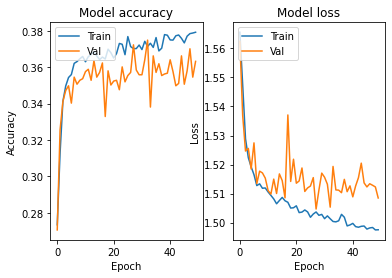

In [104]:
run_models()

In [102]:
print(df.columns)
from collections import OrderedDict
test_d = OrderedDict(Type= 1, Age= 11, Breed1 = 307, Breed2 = 0, Gender =  1, Color1 = 7, Color2 = 0,
       Color3 = 0, MaturitySize = 3, FurLength = 3, Vaccinated = 3, Dewormed = 3,
       Sterilized = 0, Health = 0, Fee = 1000)
print(test_d)
test_d = pd.DataFrame(test_d, index = [0])
t = np.array(test_d, dtype=np.int)
print(t)
np.argmax(model.predict(t), axis=-1)[0]

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Fee', 'AdoptionSpeed'],
      dtype='object')
OrderedDict([('Type', 1), ('Age', 11), ('Breed1', 307), ('Breed2', 0), ('Gender', 1), ('Color1', 7), ('Color2', 0), ('Color3', 0), ('MaturitySize', 3), ('FurLength', 3), ('Vaccinated', 3), ('Dewormed', 3), ('Sterilized', 0), ('Health', 0), ('Fee', 1000)])
[[   1   11  307    0    1    7    0    0    3    3    3    3    0    0
  1000]]


4

In [ ]:
                     test_d = OrderedDict(Type= 1, 'Age': 11, 'Breed1': 197, 'Breed2': 0, 'Gender': 1, 'Color1': 7, 'Color2': 0,
       'Color3': 0, 'MaturitySize': 3, 'FurLength': 3, 'Vaccinated': 3, 'Dewormed': 3,
       'Sterilized': 3, 'Health': 3, 'Fee': 150, 'PhotoAmt': 5, 'AdoptionSpeed': 0}